# Chapter 18: Regression Models and Evaluation
## Exercises solutions

## Exercises 1
Inspect the coefficients of the linear model trained on the polynomial features. Find the coefficient responsible for the large error and explain why it has an especially strong effect on the polynomial features. 

For this exercise we will use the *diabetes* dataset: this dataset has 10 attributes about a patient as features and disease progression after a year as the target. The dataset contains data for 442 patients.

In [6]:
# import all the modules
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

We load the dataset and analyse its attributes:

In [7]:
# load the dataset
dataset = load_diabetes()
# store the features in a variable X
X = dataset.data
# store the targets in a variable y 
y = dataset.target

# we can see that this dataset is a class 
print(f'Dataset type: \n{type(dataset)}\n')
# and it has some functions and attributes that describe it
print(f'Dataset attributes: \n{dataset.keys()}\n')
# these are our features (X)
print(f'Feaures names: \n{dataset.feature_names}\n')
# this is the features file name
print(f'Feaures file name: \n{dataset.data_filename}\n')
# this is the targets/labels file
print(f'Target file name: \n{dataset.target_filename}\n')
# number of samples
print(f'Number of samples: \n{len(dataset.data)}\n')

Dataset type: 
<class 'sklearn.utils.Bunch'>

Dataset attributes: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Feaures names: 
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Feaures file name: 
diabetes_data.csv.gz

Target file name: 
diabetes_target.csv.gz

Number of samples: 
442



Note how, differently from the previous Sklearn datasets, the *diabetes* dataset pulls features and targets data from two different datafiles. 

We split the data in training, validation and test sets:

In [8]:
from sklearn.model_selection import train_test_split

seed = 0 # this is used with the train_test_split to avoid random behaviour 

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.4,random_state=seed)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=.5,random_state=seed)

print(f'Number of features in the training set: {len(X_train)}')
print(f'Number of features in the validation set: {len(X_val)}')
print(f'Number of features in the test set: {len(X_test)}')

Number of features in the training set: 265
Number of features in the validation set: 89
Number of features in the test set: 88


We stadardize the features:

In [9]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X_train) # scale to 0 mean and std dev 1 on training data

X_train_scl = sclr.transform(X_train) # scale all 3 sets:
X_val_scl = sclr.transform(X_val)
X_test_scl = sclr.transform(X_test)


print(f'X_train_scl mean: {np.mean(X_train_scl)}, X_train_scl std: {np.std(X_train_scl)}')
print(f'X_val_scl mean: {np.mean(X_val_scl)}, X_train_scl std: {np.std(X_val_scl)}')
print(f'X_test_scl mean: {np.mean(X_test_scl)}, X_test_scl std: {np.std(X_test_scl)}')

X_train_scl mean: 9.384526698718305e-18, X_train_scl std: 1.0000000000000002
X_val_scl mean: -0.026560858245457477, X_train_scl std: 0.9586107835341086
X_test_scl mean: -0.006411628461981172, X_test_scl std: 0.9215631575692944


We process the data to a second polyynomial degree, so that we have more features that relate to the input in different ways:

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pf2 = PolynomialFeatures(degree=2)
X_train_sc_pf2 = pf2.fit_transform(X_train_scl)

print(f'X_train data - Number of samples:  {X_train.shape[0]}, Number of features: {X_train.shape[1]}')
print(f'X_train_sc_pf2 - Number of samples:  {X_train_sc_pf2.shape[0]}, Number of features: {X_train_sc_pf2.shape[1]}')

X_train data - Number of samples:  265, Number of features: 10
X_train_sc_pf2 - Number of samples:  265, Number of features: 66


With the available programming libraries in Python or R, linear regression is very easy to use and just like the previous models for classification we use their fit and predict methods:

In [11]:
from sklearn.linear_model import LinearRegression

# create the polynomial features from the scaled sets 
X_val_sc_pf2 = pf2.transform(X_val_scl)
X_test_sc_pf2 = pf2.transform(X_test_scl)

# train a linar model 
lr2 = LinearRegression()
lr2.fit(X_train_sc_pf2,y_train)

# helper functions to calculate the accuracy values on train, validation and test set. 
def rmse(X,y,predictor):
    return (mse(X,y,predictor))**.5

# helper functions to calculate the accuracy values on train, validation and test set. 
def mse(X,y,predictor):
    return ((predictor.predict(X)-y)**2).mean()

def trainValTestMse(predictor):
    vals = {}
    vals['train'] = rmse(X_train_scl,y_train,predictor)
    vals['val'] = rmse(X_val_scl,y_val,predictor)
    vals['test'] = rmse(X_test_scl,y_test,predictor)
    return vals

# make predictions and print the model performance
print('Poly2 Features, train RMSE: ', rmse(X_train_sc_pf2,y_train,lr2),
      ', val RMSE: ' , rmse(X_val_sc_pf2,y_val,lr2),
      ', test RMSE: ' , rmse(X_test_sc_pf2,y_test,lr2))

Poly2 Features, train RMSE:  44.510653384993034 , val RMSE:  67.57200276608783 , test RMSE:  63.302612578827166


We can retrieve the non-zero polynamial features and see their weight:

In [26]:
nz_feature_names = pf2.get_feature_names_out()[np.nonzero(lr2.coef_)]
nz_feature_values = lr2.coef_[np.nonzero(lr2.coef_)]
zipped = list(zip(nz_feature_names,nz_feature_values))
print('Names and values of non-zero coefficients', zipped)

Names and values of non-zero coefficients [('1', 2.5223795439938152e-11), ('x0', -0.20511584590732124), ('x1', -1524667891983.5903), ('x2', 25.040544010051313), ('x3', 13.961026894473497), ('x4', 616.9132360227866), ('x5', -550.7496843582958), ('x6', -250.38763410759816), ('x7', -6.787510444727749), ('x8', -166.05624389648438), ('x9', -2.8990478515625), ('x0^2', 4.3992919921875), ('x0 x1', 11.645872592926025), ('x0 x2', -0.1331024169921875), ('x0 x3', -1.105499267578125), ('x0 x4', 18.490509033203125), ('x0 x5', -35.373291015625), ('x0 x6', 0.9011077880859375), ('x0 x7', 14.819023132324219), ('x0 x8', -3.2235870361328125), ('x0 x9', 4.136219024658203), ('x1^2', 67335183326055.91), ('x1 x2', 4.298942565917969), ('x1 x3', 6.38946533203125), ('x1 x4', 37.453277587890625), ('x1 x5', -35.497161865234375), ('x1 x6', -4.8126220703125), ('x1 x7', 6.168281555175781), ('x1 x8', -18.69781494140625), ('x1 x9', -1.32861328125), ('x2^2', 0.92742919921875), ('x2 x3', 3.303680419921875), ('x2 x4', -2.

In [28]:
# sort the features by their coefficients weights
zipped.sort(key=lambda x: x[1], reverse = True)
zipped

[('x1^2', 67335183326055.91),
 ('x4', 616.9132360227866),
 ('x4^2', 302.24859619140625),
 ('x5 x8', 249.1632080078125),
 ('x5 x6', 202.0415496826172),
 ('x6 x8', 151.4703369140625),
 ('x5^2', 139.02743530273438),
 ('x6 x7', 119.61395263671875),
 ('x5 x7', 115.12100219726562),
 ('x6^2', 93.84478759765625),
 ('x3 x5', 70.01773071289062),
 ('x7 x8', 64.32049560546875),
 ('x5 x9', 54.50048828125),
 ('x1 x4', 37.453277587890625),
 ('x7^2', 34.46563720703125),
 ('x3 x6', 32.48463439941406),
 ('x3 x8', 25.46917724609375),
 ('x2', 25.040544010051313),
 ('x6 x9', 24.528472900390625),
 ('x8^2', 23.83916473388672),
 ('x8 x9', 20.477493286132812),
 ('x0 x4', 18.490509033203125),
 ('x2 x7', 16.06646728515625),
 ('x0 x7', 14.819023132324219),
 ('x3', 13.961026894473497),
 ('x2 x6', 11.7989501953125),
 ('x0 x1', 11.645872592926025),
 ('x9^2', 8.383834838867188),
 ('x3^2', 6.927154541015625),
 ('x1 x3', 6.38946533203125),
 ('x1 x7', 6.168281555175781),
 ('x2 x8', 6.022502899169922),
 ('x0^2', 4.399291

It is particularly evident how some features'coefficients tend to "explode" (e.g., 'x1^2': 67335183326055.91 and 'x1': -1524667891983.5903) in the model's research of fitting each data point exactly. This is the typical behaviour of a model **overfitting** the traininig data, therefore incapable of generalising on unseen data and likely to yield much big errros on validation and test sets. This well known issue with high-order polynomials tends to get worse with the increasing of the polynomial order. Standard solutions to this problem are regularizations methods such as *L1 (Lasso)* and *L2 (Ridge)* which add a penalty term to the model's *cost function* proportional to the size of the coefficients, hence penalizing large values. Namely, the L1 regularization adds a *penalty* equal to the absolute value of the magnitude of the coefficients, whereas the L2 regularization one equal to the square of the magnitude. These help reduce *variance* in the model and make it generalize better.

## Exercises 2
Implement a grid search for the alpha parameter of a linear regression on the train/validation split with the poly 2 features of the diabetes data: 

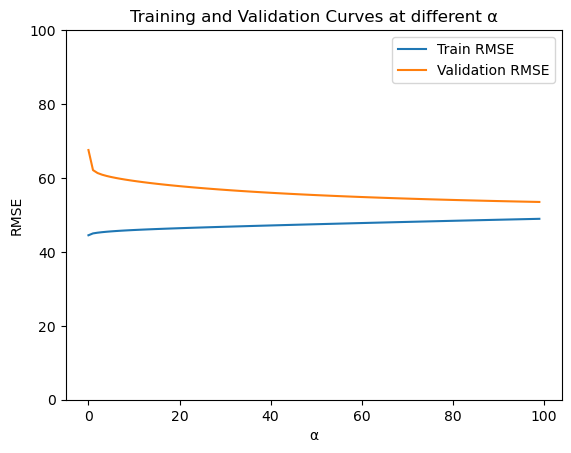

In [82]:
from sklearn.linear_model import Ridge

# we store trainig and validation scores here
scores_t = []; scores_v = [] 

# set the range of values for our hyperparameter
params = np.arange(0, 100)

# test the KNN at different number of neighbors and append the results to the above lists
for p in params:
    lr_rd = Ridge(alpha = p, fit_intercept=True)
    lr_rd.fit(X_train_sc_pf2, y_train)
    scores_t.append(rmse(X_train_sc_pf2, y_train, lr_rd))
    scores_v.append(rmse(X_val_sc_pf2, y_val, lr_rd))

# plot the training and validation curves 
plt.title("Training and Validation Curves at different α")
plt.xlabel("α")
plt.ylabel("RMSE")
plt.ylim(0, 100)
plt.plot(params, scores_t, label="Train RMSE")
plt.plot(params, scores_v, label="Validation RMSE")
plt.legend(loc="best");

## Exercises 3
Implement a grid search for the alpha parameter of a linear regression using cross validation with the poly 2 features of the diabetes data. Use the Scikit-Learn class GridSearchCV. 

In [79]:
from sklearn.model_selection import GridSearchCV

# implemente a linear least squares with l2 regularization
lr_rd = Ridge(fit_intercept=True)

# check alpha parameters between 0 and 100 
parameters = {'alpha':np.arange(0, 100)}

# in sklearn all scorer objects follow the convention that higher return values are better than lower return values. 
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error.
scoring = {'MSE': 'neg_root_mean_squared_error'}

# set a 5 fold nested grid search on the poly2 features
clf = GridSearchCV(lr_rd, parameters, scoring = scoring, refit = False, cv = 5)
clf.fit(X_train_sc_pf2, y_train)

# display the top ranked models 
pd.DataFrame(clf.cv_results_).sort_values(by = 'rank_test_MSE').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE
67,0.000905,0.000201,0.0,0.0,67,{'alpha': 67},-51.246532,-56.870821,-64.272535,-55.076004,-56.220974,-56.737373,4.241995,1
68,0.000597,0.000488,0.0,0.0,68,{'alpha': 68},-51.261669,-56.861426,-64.252735,-55.066144,-56.245864,-56.737568,4.231170,2
66,0.001001,0.000551,0.0,0.0,66,{'alpha': 66},-51.231746,-56.880644,-64.292808,-55.086603,-56.196060,-56.737572,4.252884,3


In [80]:
lr_rd = Ridge(alpha = 67, fit_intercept=True)
lr_rd.fit(X_train_sc_pf2, y_train)

print('Train RMSE: ', rmse(X_train_sc_pf2, y_train,lr_rd),)
print('Val RMSE: ', rmse(X_val_sc_pf2, y_val,lr_rd))

Train RMSE:  48.0190692372308
Val RMSE:  54.53498875140474


## Exercise 4
Load the California Housing dataset (either with sklearn.datasets.fetch_california_housing or from here ) and predict the house price (as a regression). Use different models, expand the features, tune the hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models.  

## Exercise 5
Load the Temperature Prediction Bias dataset from  here and predict the the difference between predicted and actual next day temperatures. Model this regression problem with different models and determine their optimal hyper-parameters, select the best model and estimate its performance on new data. Justify the choices or methods and models. 